# PHYS454 HW2
by Edward Sanchez

References: https://ssd.jpl.nasa.gov/horizons/manual.html

https://ssd.jpl.nasa.gov/horizons/manual.html#observer-table

https://ssd.jpl.nasa.gov/horizons/manual.html#obsquan

https://ssd.jpl.nasa.gov/horizons/tutorial.html

https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html

All files for this project can be found in Github.
https://github.com/es2903/PHYS454/tree/main/HW2

### 1a. Prove Kepler's second law numerically

In [1]:
# 1a. Use JPL Horizons Web app (https://ssd.jpl.nasa.gov/horizons/app.html#/) to retrieve some position data 
# about an object orbiting the sun. Try to show Kepler's 2nd law by numerically estimating the area swept out
# by the orbit during a short time duration and comparing that area to an equal time duration at another 
# location along the orbit.
from astropy.coordinates import SkyCoord
from astroquery.jplhorizons import Horizons
from astropy.time import Time

# Mercury has an orbital period of 88 days so I use a 90-day period
mercury_start_time = '2024-01-01T00:00:00.00'
mercury_end_time = '2024-03-29T23:59:59.00'

# Generate ephemeris for Mercury
# https://ssd.jpl.nasa.gov/horizons/tutorial.html
mercury = Horizons('199', location='@sun', epochs={'start':mercury_start_time,'stop':mercury_end_time,'step':'1d'})
table_mercury = mercury.vectors(refplane='ecliptic')
coord_mercury = SkyCoord(table_mercury['x'].quantity, table_mercury['y'].quantity, table_mercury['z'].quantity, 
                         representation_type='cartesian', frame='icrs',obstime=mercury_start_time)

print(coord_mercury)

<SkyCoord (ICRS): (x, y, z) in AU
    [(-0.27463037,  0.20036221,  4.15640302e-02),
     (-0.29593486,  0.17809692,  4.16986213e-02),
     (-0.31516174,  0.15457935,  4.15403085e-02),
     (-0.33227883,  0.13002522,  4.11037681e-02),
     (-0.3472754 ,  0.1046397 ,  4.04047825e-02),
     (-0.36015893,  0.07861603,  3.94598307e-02),
     (-0.37095213,  0.05213478,  3.82857501e-02),
     (-0.37969021,  0.02536349,  3.68994632e-02),
     (-0.38641843, -0.00154315,  3.53177634e-02),
     (-0.39119005, -0.02844298,  3.35571523e-02),
     (-0.39406447, -0.05520578,  3.16337205e-02),
     (-0.39510575, -0.08171261,  2.95630637e-02),
     (-0.39438133, -0.10785505,  2.73602286e-02),
     (-0.39196101, -0.13353441,  2.50396816e-02),
     (-0.3879161 , -0.15866096,  2.26152963e-02),
     (-0.38231873, -0.18315316,  2.01003539e-02),
     (-0.37524137, -0.20693692,  1.75075548e-02),
     (-0.36675641, -0.22994496,  1.48490376e-02),
     (-0.3569358 , -0.25211609,  1.21364039e-02),
     (-0.3458509

### Observer & Vector Tables
If an observer or vector table has been requested, the @ symbol may be dropped; the Earth will be assumed if only an integer like 675 or a name fragment like Palom is input.

However, if you are trying to specify an observing site not on Earth, you MUST use the @ symbol for correct interpretation. For example, if an observer table as seen from the Sun is desired, it must be specified as @10 or @sun. Specifying 10 only will select the Caussols site.

For location 0 and ssb refer to solar system barycenter (SSB). 

For id 1 = Mercury Barycenter and 199 = Mercury. 

For Mercury and Venus, there is no difference between planet-center and system barycenter (1=199, 2=299) as far as Horizons selection is concerned because there is only the planet: no satellites, so no offset between planet center and planetary system center-of-mass. 
https://ssd.jpl.nasa.gov/horizons/manual.html

-0.01750636558649063 -0.07750222055156711


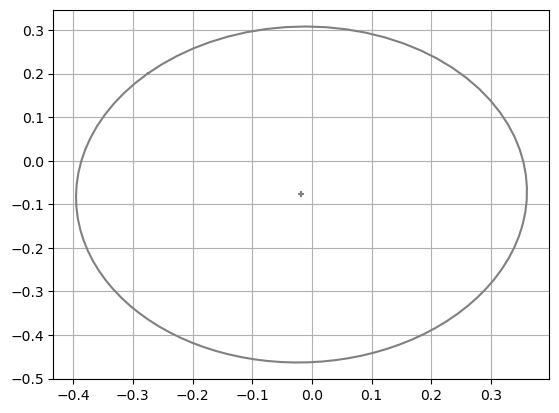

In [2]:
import matplotlib.pyplot as plt

# Solar system barycenter at x = 0, y = 0
mercury_ellipse_xcenter = (max(table_mercury['x']) + min(table_mercury['x'])) / 2
mercury_ellipse_ycenter = (max(table_mercury['y']) + min(table_mercury['y'])) / 2
print (mercury_ellipse_xcenter, mercury_ellipse_ycenter)

fig1 = plt.figure(1)

def plot1():
    plt.plot(table_mercury['x'], table_mercury['y'], color='grey')
    plt.scatter(mercury_ellipse_xcenter, mercury_ellipse_ycenter, s=25, marker='+', color='grey')
    plt.grid()

plot1()
plt.show()

In [3]:
# https://ssd.jpl.nasa.gov/planets/approx_pos.html
# Keplerian elements and rates
# Table 1
# Mercury semi-major axis (AU) and eccentricity
mercury_sma = 0.38709927
mercury_ecc = 0.20563593

# Calculate semi-minor axis in AU
mercury_b = mercury_sma * (1 - mercury_ecc**2)
print(f'The eccentricity of Mercury is e = {mercury_ecc:.5f}.')
print(f'The semi-major axis is {mercury_sma:.5f} AU and the semi-minor axis is {mercury_b:.5f} AU.')

The eccentricity of Mercury is e = 0.20564.
The semi-major axis is 0.38710 AU and the semi-minor axis is 0.37073 AU.


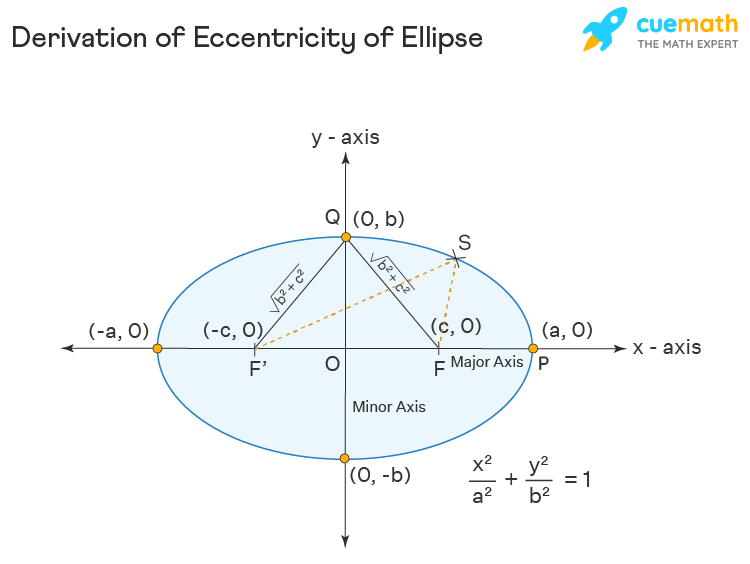

In [4]:
import numpy as np

# Finding the ellipse foci
c_mercury = np.sqrt(mercury_sma**2 - mercury_b**2) 
left_focus = mercury_ellipse_xcenter - c_mercury
right_focus = mercury_ellipse_xcenter + c_mercury
print(f'The two focii lie on ({left_focus:.2f}, {mercury_ellipse_ycenter:.2f}) and ({right_focus:.2f}, {mercury_ellipse_ycenter:.2f}).')

The two focii lie on (-0.13, -0.08) and (0.09, -0.08).


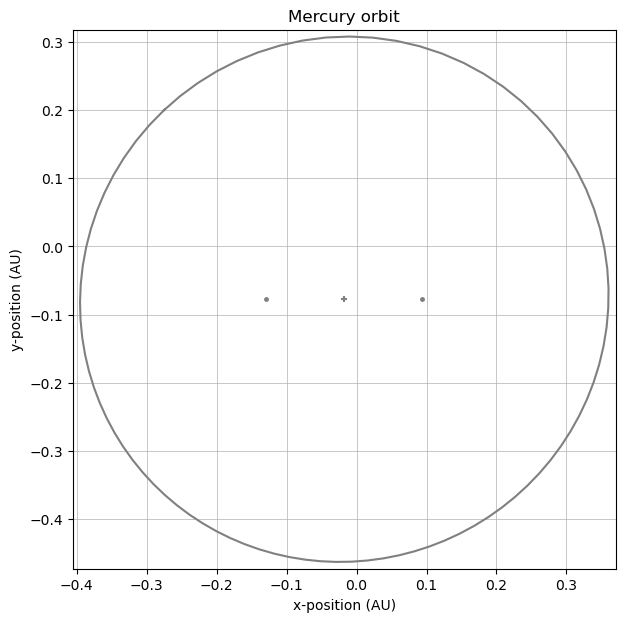

In [5]:
# Foci locations
foci_locations = np.array([[left_focus, mercury_ellipse_ycenter],
                           [right_focus, mercury_ellipse_ycenter]])

# Plot Mercury orbit with new information and more accuracy
fig2 = plt.figure(2, figsize=(7, 7))

def plot2():
    plot1()
    plt.scatter(foci_locations[:, 0], foci_locations[:, 1], s=25, marker='.', color='grey')

    plt.title('Mercury orbit')
    plt.xlabel('x-position (AU)')
    plt.ylabel('y-position (AU)')
    plt.xlim(min(table_mercury['x'] - 0.01), max(table_mercury['x'] + 0.01))
    plt.ylim(min(table_mercury['y'] - 0.01), max(table_mercury['y'] + 0.01))
    plt.grid(linewidth=0.5)

plot2()
plt.show()

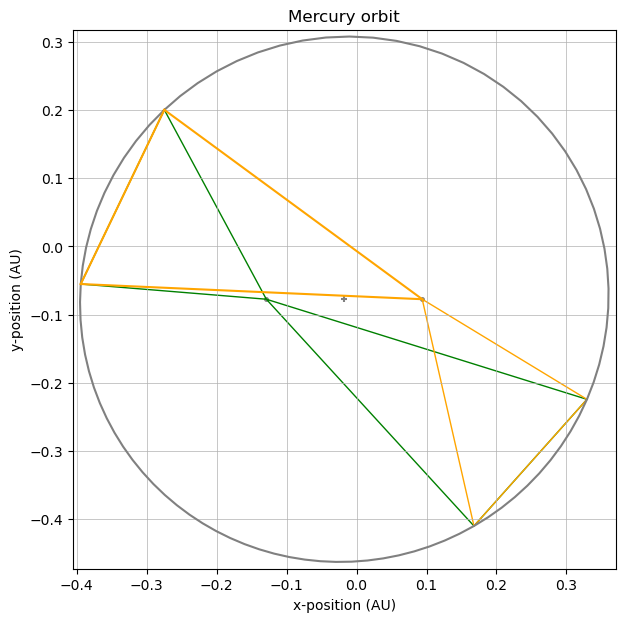

In [6]:
# Visualization of triangles used for area calculations
import matplotlib.patches as patches

start_point = 0

# Defining the first triangle
vertices1 = [(left_focus, mercury_ellipse_ycenter), (table_mercury['x'][start_point], table_mercury['y'][start_point]),
            (table_mercury['x'][start_point+10], table_mercury['y'][start_point+10])]
triangle1 = patches.Polygon(vertices1, closed=True, edgecolor='g', facecolor='none')

triangle_base = np.array([[right_focus, mercury_ellipse_ycenter],
                         [table_mercury['x'][start_point], table_mercury['y'][start_point]]])
triangle_height = np.array([[table_mercury['x'][start_point], table_mercury['y'][start_point]],
                            [table_mercury['x'][start_point+10], table_mercury['y'][start_point+10]]])
triangle_hypotenuse = np.array([[table_mercury['x'][start_point+10], table_mercury['y'][start_point+10]],
                                [right_focus, mercury_ellipse_ycenter]])

# Defining the second triangle
vertices2 = [(left_focus, mercury_ellipse_ycenter), (table_mercury['x'][start_point+45], table_mercury['y'][start_point+45]),
            (table_mercury['x'][start_point+55], table_mercury['y'][start_point+55])]
triangle2 = patches.Polygon(vertices2, closed=True, edgecolor='g', facecolor='none')

vertices2b = [(right_focus, mercury_ellipse_ycenter), (table_mercury['x'][start_point+45], table_mercury['y'][start_point+45]),
            (table_mercury['x'][start_point+55], table_mercury['y'][start_point+55])]
triangle2b = patches.Polygon(vertices2b, closed=True, edgecolor='orange', facecolor='none')

fig3 = plt.figure(3, figsize=(7, 7))

def plot3():
    plot2()
    plt.plot(triangle_base[:, 0], triangle_base[:, 1], color='orange')
    plt.plot(triangle_height[:, 0], triangle_height[:, 1], color='orange')
    plt.plot(triangle_hypotenuse[:, 0], triangle_hypotenuse[:, 1], color='orange')
    ax = plt.gca()
    ax.add_patch(triangle1)
    ax.add_patch(triangle2)
    ax.add_patch(triangle2b)

plot3()
plt.show()

Those triangles do not look like they have equal areas...
I finally realized my mistake. The Sun is at (0,0). I incorrectly assumed that the foci of Mercury's orbits lied on a horizontal line passing through the center of the ellipse.

### Setting the Sun at (0,0)

In [7]:
# Correct Mercury foci locations
sun_location = [0,0]
other_mercury_focus = [sun_location[0] + mercury_ellipse_xcenter, sun_location[1] + mercury_ellipse_ycenter]

# Triangles for swept out area
vertices4a = [(0, 0), (table_mercury['x'][start_point], table_mercury['y'][start_point]),
            (table_mercury['x'][start_point+10], table_mercury['y'][start_point+10])]
triangle4a = patches.Polygon(vertices4a, closed=True, edgecolor='g', facecolor='none')

vertices4b = [(0, 0), (table_mercury['x'][start_point+50], table_mercury['y'][start_point+50]),
            (table_mercury['x'][start_point+60], table_mercury['y'][start_point+60])]
triangle4b = patches.Polygon(vertices4b, closed=True, edgecolor='g', facecolor='none')

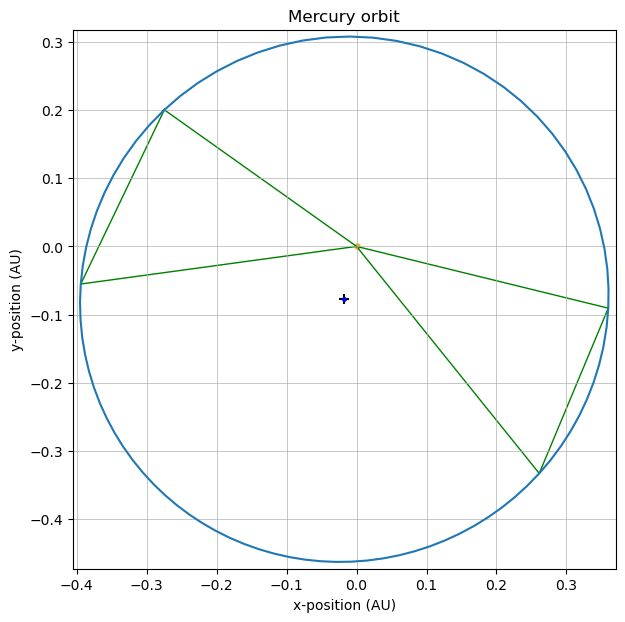

In [8]:
# Plotting the Sun at (0,0)
fig4, ax4 = plt.subplots(figsize=(7,7))

ax4.plot(table_mercury['x'], table_mercury['y'])
ax4.scatter(mercury_ellipse_xcenter, mercury_ellipse_ycenter, s=50, marker='+', color='k')
ax4.scatter(sun_location[0], sun_location[1], s=50, marker='.', color='orange')
ax4.scatter(other_mercury_focus[0], other_mercury_focus[1], s=25, marker='.', color='blue')

ax4.set(title='Mercury orbit')
ax4.set(xlabel='x-position (AU)')
ax4.set(ylabel='y-position (AU)')
ax4.set_xlim(min(table_mercury['x'] - 0.01), max(table_mercury['x'] + 0.01))
ax4.set_ylim(min(table_mercury['y'] - 0.01), max(table_mercury['y'] + 0.01))
ax4.grid(linewidth=0.5)

ax4.add_patch(triangle4a)
ax4.add_patch(triangle4b)

Finally!! One focus is where the Sun is (orange dot) and the other focus (blue dot) is a reflection of the the Sun's location about the center of the ellipse. 

In [9]:
# Calculating area for triangles by one at a time

def calculate_swept_area(starting_day):
    swept_area = 0
    for i in range(starting_day, starting_day + 10):
        base_length = ((table_mercury['x'][i] - sun_location [0])**2 +
                        (table_mercury['y'][i] - sun_location [1])**2)**0.5
        height = ((table_mercury['x'][i+1] - table_mercury['x'][i])**2 +
                   (table_mercury['y'][i+1] - table_mercury['y'][i])**2)**0.5   
        swept_area += 0.5 * base_length * height
    print(f'The swept area for days {starting_day} to {starting_day+9} is {swept_area:.5f} AU².')
#     return swept_area

calculate_swept_area(0)
calculate_swept_area(10)
calculate_swept_area(20)
calculate_swept_area(30)
calculate_swept_area(40)
calculate_swept_area(50)
calculate_swept_area(60)
calculate_swept_area(70)

The swept area for days 0 to 9 is 0.05264 AU².
The swept area for days 10 to 19 is 0.05260 AU².
The swept area for days 20 to 29 is 0.05209 AU².
The swept area for days 30 to 39 is 0.05208 AU².
The swept area for days 40 to 49 is 0.05273 AU².
The swept area for days 50 to 59 is 0.05334 AU².
The swept area for days 60 to 69 is 0.05308 AU².
The swept area for days 70 to 79 is 0.05216 AU².


The swept areas of Mercury's orbit are very, very close to one another. We can increase the accuracy of the areas by decreasing the time between each calculating (i.e., decreasing the period to half a day). 

### 1b. Plot of Mercury orbit and Earth orbit
Make a plot showing the orbit of the object you chose as well as the orbit of the Earth around the sun for a comparison/reference. (The techniques used in problem 3 will be helpful for this)

In [10]:
# Generating Earth ephemeris tables
earth_start_time = '2024-01-01T00:00:00.00'
earth_end_time = '2025-01-01T00:00:00.00'

earth = Horizons('3', location='@sun', epochs={'start':earth_start_time,'stop':earth_end_time,'step':'1d'})
table_earth = earth.vectors(refplane='ecliptic')
coord_earth = SkyCoord(table_earth['x'].quantity, table_earth['y'].quantity, table_earth['z'].quantity, 
                         representation_type='cartesian', frame='icrs',obstime=earth_start_time)

# https://ssd.jpl.nasa.gov/horizons/manual.html
# 3 is the Earth-Moon Barycenter point about which the Earth and Moon both move

In [11]:
# https://ssd.jpl.nasa.gov/planets/approx_pos.html
# Keplerian elements and rates
# Table 1
# Mercury semi-major axis (AU) and eccentricity
earth_sma = 1.00000261
earth_ecc = 0.01671123

# Calculate semi-minor axis in AU
earth_b = earth_sma * (1 - earth_ecc**2)
print(f'The eccentricity of Earth is e = {earth_ecc:.5f}.')
print(f'The semi-major axis is {earth_sma:.5f} AU and the semi-minor axis is {earth_b:.5f} AU.')

The eccentricity of Earth is e = 0.01671.
The semi-major axis is 1.00000 AU and the semi-minor axis is 0.99972 AU.


In [12]:
# Locating other Earth focus
earth_ellipse_xcenter = (max(table_earth['x']) + min(table_earth['x'])) / 2
earth_ellipse_ycenter = (max(table_earth['y']) + min(table_earth['y'])) / 2
print (earth_ellipse_xcenter, earth_ellipse_ycenter)

other_earth_focus = [sun_location[0] + 2*earth_ellipse_xcenter, sun_location[1] + 2*earth_ellipse_ycenter]

# Checking Mercury and Earth ellipse centers and foci
print(f'The Mercury ellipse center is at ({mercury_ellipse_xcenter:.5f}, {mercury_ellipse_ycenter:.5f}).')
print(f'The Sun is at (0, 0) and the other Mercury focus is at ({other_mercury_focus[0]:.5f}, {other_mercury_focus[1]:.5f}).')

print(f'The Earth ellipse center is at ({earth_ellipse_xcenter:.5f}, {earth_ellipse_ycenter:.5f}).')
print(f'The Sun is at (0, 0) and the other Earth focus is at ({other_earth_focus[0]:.5f}, {other_earth_focus[1]:.5f}).')

0.003776986511541347 -0.01626859113198853
The Mercury ellipse center is at (-0.01751, -0.07750).
The Sun is at (0, 0) and the other Mercury focus is at (-0.01751, -0.07750).
The Earth ellipse center is at (0.00378, -0.01627).
The Sun is at (0, 0) and the other Earth focus is at (0.00755, -0.03254).


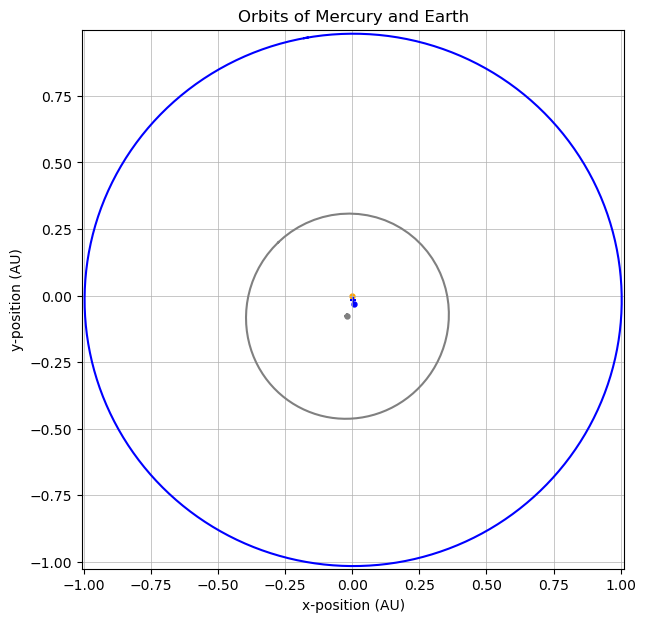

In [13]:
# Plotting Mercury orbit and Earth orbit
fig5, ax5 = plt.subplots(figsize=(7,7))

ax5.scatter(sun_location[0], sun_location[1], s=50, marker='.', color='orange')
ax5.scatter(mercury_ellipse_xcenter, mercury_ellipse_ycenter, s=25, marker='+', color='grey')
ax5.scatter(earth_ellipse_xcenter, earth_ellipse_ycenter, s=25, marker='+', color='b')

ax5.plot(table_mercury['x'], table_mercury['y'], color='grey')
ax5.scatter(other_mercury_focus[0], other_mercury_focus[1], s=50, marker='.', color='grey')

ax5.plot(table_earth['x'], table_earth['y'], color='b')
ax5.scatter(other_earth_focus[0], other_earth_focus[1], s=50, marker='.', color='b')

ax5.set(title='Orbits of Mercury and Earth')
ax5.set(xlabel='x-position (AU)')
ax5.set(ylabel='y-position (AU)')
ax5.set_xlim(min(table_earth['x'] - 0.01), max(table_earth['x'] + 0.01))
ax5.set_ylim(min(table_earth['y'] - 0.01), max(table_earth['y'] + 0.015))
ax5.grid(linewidth=0.5)

The blue '+' points to the blue ellipse center (aka Earth's orbit). The grey '+' points to the grey ellipse center (aka Mercury's orbit). The orange dot designates the location of the Sun, which is the primary focus for both Mercury's orbit (grey ellipse) and the Earth's orbit (blue ellipse). The blue dot is the location of the second focus for the blue ellipse and the grey dot is the location of the second focus for the grey ellipse. 

### 2. (Not) to Scale

Find an image online that shows an astronomical illustration that is made out of scale. Comment on what is 'wrong' with it.

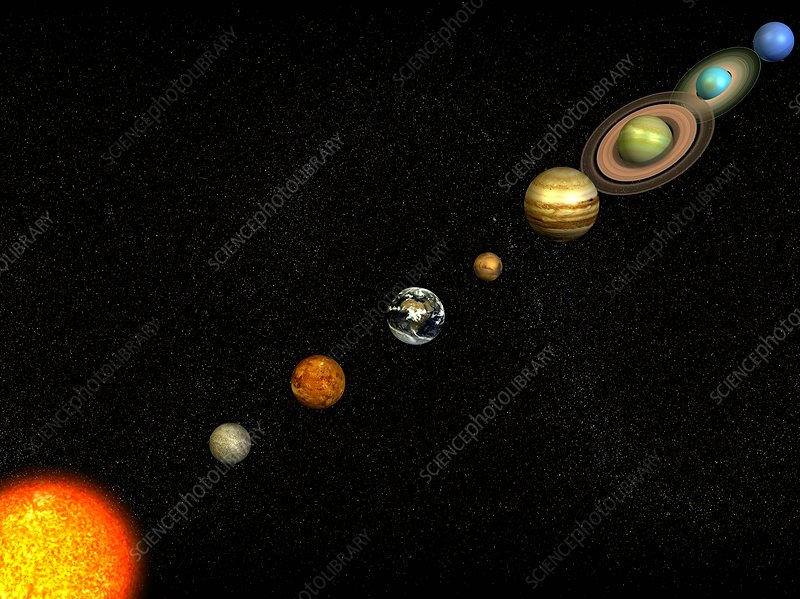

This image contains the four inner rocky planets and the four outer gas giant planets. Not only are the orbits of the planets not to scale, the relative sizes of every planet (and our Sun) is off scale. 

### 3a.	IM1 Mission

Prepare a plot that shows the trajectory of the recent Intuitive Machines to land on the moon, from a bird's eye view of looking down on the Earth Moon system.
Here is a version that you can use as guidance to see what the trajectory looks like. But make a nice plot with axes, etc.
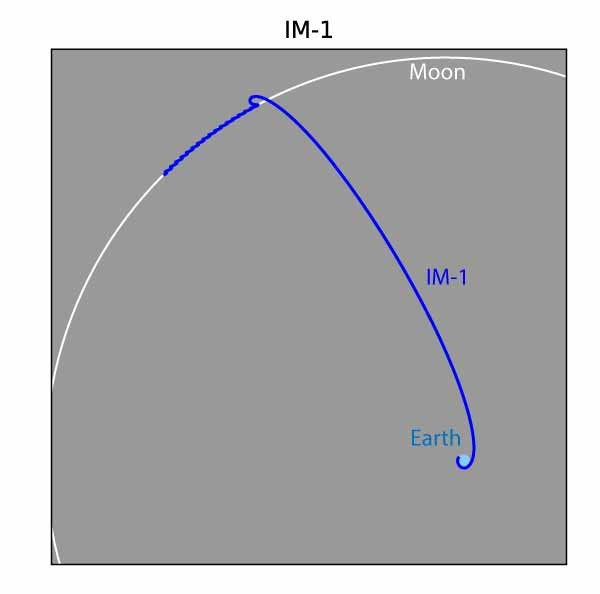

https://ssd.jpl.nasa.gov/horizons/manual.html
    
If you request orbital elements of the Earth (399) with respect to Sun (10), the resulting elements will contain short-period oscillations due to the Earth’s motion with respect to the Earth-Moon barycenter, as well as the Sun’s motion with respect to the solar system barycenter. Unless these short period motions are desired, you might want to instead request 3 with respect to 0 (Earth-Moon barycenter with respect to solar system barycenter).

In [14]:
# The IM-1 trip began at 2024-02-15 06:06 and ended at 2024-02-22 22:50
moon_start_time = '2024-02-14T00:00:00.00'
moon_end_time = '2024-03-12T12:00:00.00'

# Generate ephemeris for Mercury
# https://ssd.jpl.nasa.gov/horizons/tutorial.html
moon = Horizons('301', location='@399', epochs={'start':moon_start_time,'stop':moon_end_time,'step':'1h'})
table_moon = moon.vectors()
coord_moon = SkyCoord(table_moon['x'].quantity, table_moon['y'].quantity, table_moon['z'].quantity, 
                         representation_type='cartesian', frame='icrs',obstime=moon_start_time)

print(coord_moon, len(coord_moon))

<SkyCoord (ICRS): (x, y, z) in AU
    [( 2.29249828e-03,  8.67619839e-04,  1.59527018e-05),
     ( 2.28453851e-03,  8.91987480e-04,  1.82514465e-05),
     ( 2.27633737e-03,  9.16258952e-04,  2.05482492e-05),
     ( 2.26789612e-03,  9.40431850e-04,  2.28428688e-05),
     ( 2.25921603e-03,  9.64503791e-04,  2.51350657e-05),
     ( 2.25029837e-03,  9.88472408e-04,  2.74246010e-05),
     ( 2.24114447e-03,  1.01233536e-03,  2.97112372e-05),
     ( 2.23175567e-03,  1.03609031e-03,  3.19947377e-05),
     ( 2.22213333e-03,  1.05973497e-03,  3.42748673e-05),
     ( 2.21227882e-03,  1.08326705e-03,  3.65513917e-05),
     ( 2.20219356e-03,  1.10668429e-03,  3.88240781e-05),
     ( 2.19187897e-03,  1.12998444e-03,  4.10926947e-05),
     ( 2.18133650e-03,  1.15316529e-03,  4.33570110e-05),
     ( 2.17056762e-03,  1.17622464e-03,  4.56167979e-05),
     ( 2.15957382e-03,  1.19916030e-03,  4.78718276e-05),
     ( 2.14835661e-03,  1.22197014e-03,  5.01218735e-05),
     ( 2.13691752e-03,  1.24465200e-03

In [15]:
# Moon values
moon_sma = 384400    # km
moon_ecc = 0.05490
moon_b = moon_sma * (1 - moon_ecc**2)
print(f'The eccentricity of the Moon is e = {moon_ecc:.5f}.')
print(f'The semi-major axis is {moon_sma} km and the semi-minor axis is {moon_b:.0f} km.')

moon_ellipse_xcenter = (max(table_moon['x']) + min(table_moon['x'])) / 2
moon_ellipse_ycenter = (max(table_moon['y']) + min(table_moon['y'])) / 2

# Earth foci locations
earth_location = [0,0]
other_moon_focus = [earth_location[0] + 2*moon_ellipse_xcenter, earth_location[1] + 2*moon_ellipse_ycenter]

print(f'The Earth is on one focus at ({earth_location[0]}, {earth_location[1]}).')
print(f'The ellipse center is at ({moon_ellipse_xcenter:.5f}, {moon_ellipse_ycenter:.5f}).')
print(f'The other focus is at ({other_moon_focus[0]:.5f}, {other_moon_focus[1]:.5f}).')

The eccentricity of the Moon is e = 0.05490.
The semi-major axis is 384400 km and the semi-minor axis is 383241 km.
The Earth is on one focus at (0, 0).
The ellipse center is at (-0.00016, 0.00005).
The other focus is at (-0.00032, 0.00009).


In [16]:
# Intuitive Machines 1 values
im1_start_time = '2024-02-15T06:07:00.00'
im1_end_time = '2024-02-22T22:50:00.00'

# Generate ephemeris for IM-1
# https://ssd.jpl.nasa.gov/horizons/tutorial.html
im1 = Horizons('-229', location='@399', epochs={'start':im1_start_time,'stop':im1_end_time,'step':'1min'})
table_im1 = im1.vectors()
coord_im1 = SkyCoord(table_im1['x'].quantity, table_im1['y'].quantity, table_im1['z'].quantity, 
                         representation_type='cartesian', frame='icrs',obstime=im1_start_time)

print(coord_im1, len(coord_im1))

<SkyCoord (ICRS): (x, y, z) in AU
    [(-3.39922373e-05, 2.24553151e-05, 1.24707175e-05),
     (-3.41583904e-05, 2.23573006e-05, 1.25720569e-05),
     (-3.46129524e-05, 2.21467878e-05, 1.28454751e-05), ...,
     (-1.94565419e-03, 1.85832806e-03, 1.97680438e-04),
     (-1.94595695e-03, 1.85804518e-03, 1.97667402e-04),
     (-1.94623587e-03, 1.85776845e-03, 1.97652606e-04)]> 11084


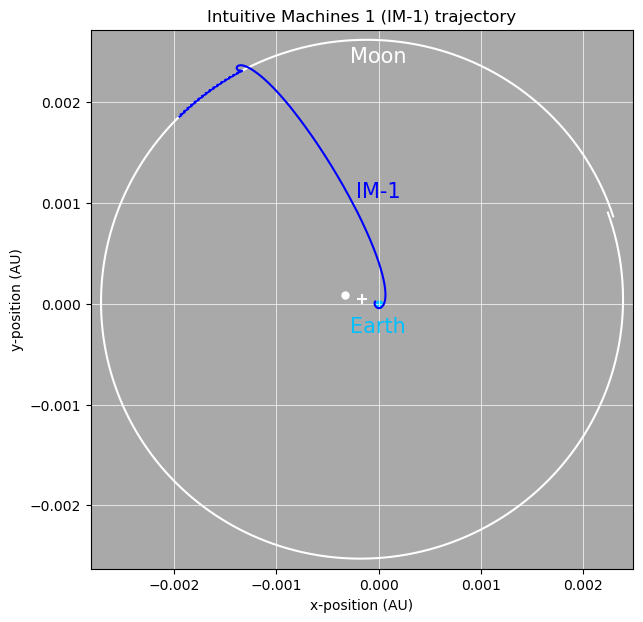

In [34]:
# Plotting Moon path with Earth center and IM-1 trajectory
fig6, ax6 = plt.subplots(figsize=(7,7))
ax6.set_facecolor('darkgrey')

ax6.scatter(earth_location[0], earth_location[1], s=100, marker='.', color='deepskyblue')
ax6.scatter(moon_ellipse_xcenter, moon_ellipse_ycenter, s=50, marker='+', color='w')

ax6.plot(table_moon['x'], table_moon['y'], color='w')
ax6.scatter(other_moon_focus[0], other_moon_focus[1], s=100, marker='.', color='w')

ax6.plot(table_im1['x'], table_im1['y'], color='b')

ax6.set(title='Intuitive Machines 1 (IM-1) trajectory')
ax6.set(xlabel='x-position (AU)')
ax6.set(ylabel='y-position (AU)')

# Labeling the Earth, Moon, and IM-1
ax6.text(0.52, 0.45, 'Earth', color='deepskyblue', fontsize=15,
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax6.text(0.52, 0.95, 'Moon', color='w', fontsize=15, 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax6.text(0.52, 0.7, 'IM-1', color='b', fontsize=15,
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)

ax6.set_xlim(min(table_moon['x'] - 0.0001), max(table_moon['x'] + 0.0001))
ax6.set_ylim(min(table_moon['y'] - 0.0001), max(table_moon['y'] + 0.0001))
ax6.grid(color='w', linewidth=0.5)

The white '+' points to the white ellipse center (aka the Moon's orbit). The light blue dot designates the location of the Earth, which is the primary focus for the Moon's orbit. The white dot is the location of the second focus for the white ellipse. 

### b. Prepare at least 2 other plots showing something interesting about the trajectory. 
Perhaps showing a zoom in of a region. Or plotting a view from a different direction (i.e. lik X and Z instead of X and Y), or including the velocity information. Your choice. But do something interesting. Comment on it.

In [42]:
# Zooming in on the launch of IM-5
# fig7, (ax7a, ax7b) = plt.subplots(nrows=2, ncols=1, figsize=(7,7), tight_layout=True)

# ax7a = ax6
# ax7a.set_xlim(min(moon_ellipse_xcenter - 0.001, earth_location[0] + 0.001))
# ax7a.set_ylim(min(moon_ellipse_ycenter + 0.001, earth_location[0] - 0.001))

# ax7b = ax6
# ax7b.set_xlim(min(- 0.002, 0.001))
# ax7b.set_ylim(min(0.001, 0.003))

In [46]:
# Zooming in on the launch of IM-5

# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# ax6_zoom_inset_launch = inset_axes(ax, width="30%", height="30%", loc='upper right')

# import matplotlib.axes.Axes.inset_axes

# fig7 = fig6.copy()
# ax6_zoom_launch = inset_ax([-0.002, 0.0015, 0.001, 0.001])

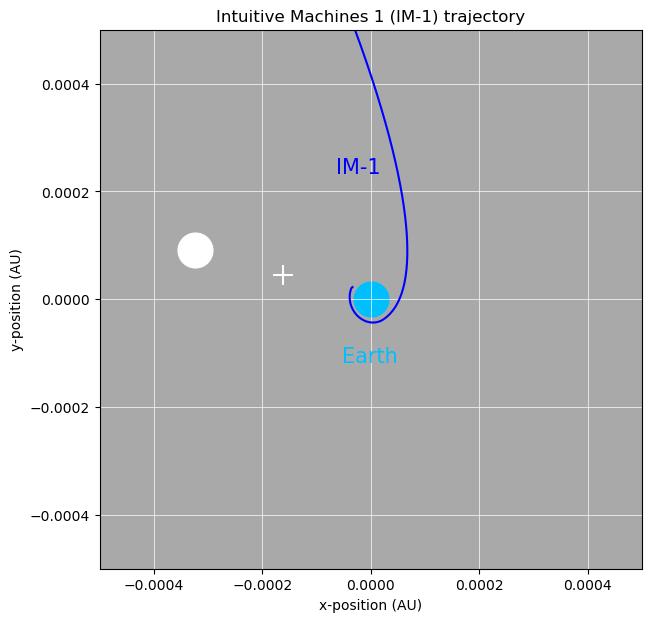

In [59]:
# Zooming in on the launch of IM-5
fig7, ax7 = plt.subplots(figsize=(7,7))
ax7.set_facecolor('darkgrey')

ax7.scatter(earth_location[0], earth_location[1], s=2500, marker='.', color='deepskyblue')
ax7.scatter(moon_ellipse_xcenter, moon_ellipse_ycenter, s=200, marker='+', color='w')

ax7.plot(table_moon['x'], table_moon['y'], color='w')
ax7.scatter(other_moon_focus[0], other_moon_focus[1], s=2500, marker='.', color='w')

ax7.plot(table_im1['x'], table_im1['y'], color='b')

ax7.set(title='Intuitive Machines 1 (IM-1) trajectory')
ax7.set(xlabel='x-position (AU)')
ax7.set(ylabel='y-position (AU)')

# Labeling the Earth, Moon, and IM-1
ax7.text(0.52, 0.35, 'Earth', color='deepskyblue', fontsize=15,
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax7.text(0.5, 0.7, 'IM-1', color='b', fontsize=15,
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)

ax7.set_xlim(-0.0005, 0.0005)
ax7.set_ylim(-0.0005, 0.0005)
ax7.grid(color='w', linewidth=0.5)

The white '+' points to the white ellipse center (aka the Moon's orbit). The light blue dot designates the location of the Earth, which is the primary focus for the Moon's orbit. The white dot is the location of the second focus for the white ellipse (the white ellipse is not visible in this graph). 

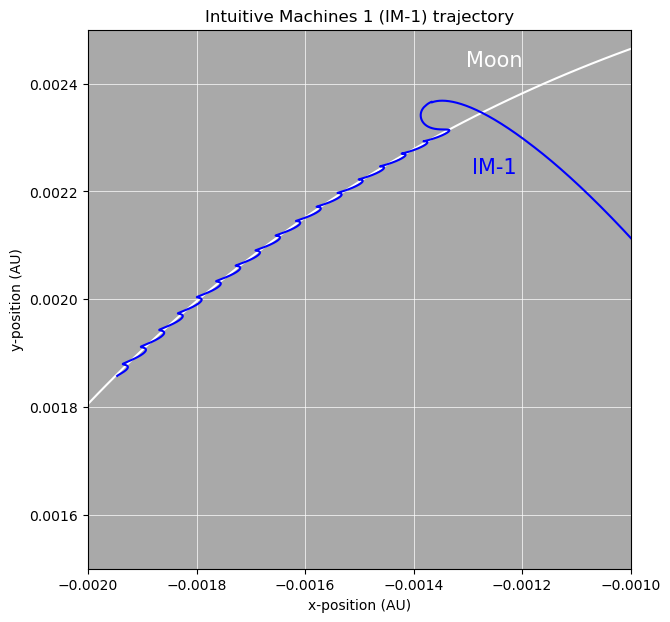

In [65]:
# Zooming in on the landing of IM-5
fig8, ax8 = plt.subplots(figsize=(7,7))
ax8.set_facecolor('darkgrey')

ax8.scatter(earth_location[0], earth_location[1], s=2500, marker='.', color='deepskyblue')
ax8.scatter(moon_ellipse_xcenter, moon_ellipse_ycenter, s=200, marker='+', color='w')

ax8.plot(table_moon['x'], table_moon['y'], color='w')
ax8.scatter(other_moon_focus[0], other_moon_focus[1], s=2500, marker='.', color='w')

ax8.plot(table_im1['x'], table_im1['y'], color='b')

ax8.set(title='Intuitive Machines 1 (IM-1) trajectory')
ax8.set(xlabel='x-position (AU)')
ax8.set(ylabel='y-position (AU)')

# Labeling the Earth, Moon, and IM-1
ax8.text(0.75, 0.9, 'Moon', color='w', fontsize=15, 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
ax8.text(0.75, 0.7, 'IM-1', color='b', fontsize=15,
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)

ax8.set_xlim(-0.002, -0.001)
ax8.set_ylim(0.0015, 0.0025)
ax8.grid(color='w', linewidth=0.5)